In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

# Write a function that takes in the URL of the data frame and returns a cleaned an paired down one

In [70]:
def catch_up(directory):
    """
    directory --> string, url of the the csv
        - eg '../../src/csv/employed_adults_apr2020_jul2020.csv'
    
    returns --> pandas.DataFrame containing features of intereast
    
    dependencies: 
    packages: pandas
    functions: job_loss_categorization
    """
    # load in df
    df = pd.read_csv('../../src/csv/employed_adults_apr2020_jul2020.csv', index_col=0)
    
    # create target variable
    target = df.PREMPNOT_y.apply(job_loss_categorization)
                                        
    # append target to df
    df['target'] = target
    
    # drop future data
    to_drop = [column for column in df.columns if "_y" in column]
    df = df.drop(columns=to_drop)
    
    # remove _x from columns
    df.columns = [column.split("_")[0] for column in df.columns]
    
    # feature list
    feature_list = [
    'HEHOUSUT', # type of housing unit to dummy DONE
    'HWHHWGT', # Household weight
    'GESTFIPS', # state codes
    "GTMETSTA", # Metropolitan or not DONE
    'HEFAMINC', # total family income 
    "HRNUMHOU", # total number of people living in the house hold
    'HRHTYPE', # household type eg civilian or married etc
    'PERRP', # relationship to reference, -1, 40 and 41
    'PRTAGE', # person's age
    'PEMARITL', # marital status
    'PESEX', # gender 1 == male, 2 == female
    'PEEDUCA', # level of education see dict for coding
    'PTDTRACE', # race composition of the house. See data dict
    "PEHSPNON", # hispanic or not hispanic
    'PENATVTY', # country of birth ie US born or not
    "PRCITSHP", # citezen status
    "PRINUSYR", # Year since immigration -1== us born, else coded by decade
    "PRHRUSL", # Hours at work, dummy into full time or not full time
    "HUBUS", # Does anyone have a business or a farm? are you a business owner?
    "PEMJOT", # Do you have more than 1 job?
    "PEMJNUM", # how many jobs do you have?
    "PEHRFTPT", # Do you normally spend more than 35 hours a week at your main job?
    "PEHRRSN2", # what is the main reason you do not want to work 35 hours. Speaks to motivation of keeping job.
    "PEHRACTT", # sum of hours worked between all jobs
    "PRAGNA", # Agricultural industry yes or no
    "PRNMCHLD", # number of children less than 18 years old (-1 not a parent, 0-99 number of children)
    "PECYC", # How much college credit in years has the reference person recieved?
    "PECERT1", # Do you have a professional certification issued at state or federal level.
    "PRMJIND1", # industry cat
    "PRMJOCC1", # industry cat
    'target'
    ]
    
    # subset the data frame with our desired columns
    df = df[feature_list]
    
    return df

In [71]:
df = catch_up('../../src/csv/employed_adults_apr2020_jul2020.csv')

In [ ]:
for column in iter

In [77]:
census_df = pd.read_csv('../../src/csv/employed_adults_apr2020_jul2020.csv', index_col=0)

In [3]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 9 to 72340
Columns: 777 entries, HRHHID_x to IND_ID_FINAL_y
dtypes: int64(774), object(3)
memory usage: 23.6+ MB


In [4]:
census_df.columns

Index(['HRHHID_x', 'HRMONTH_x', 'HRYEAR4_x', 'HURESPLI_x', 'HUFINAL_x',
       'HETENURE_x', 'HEHOUSUT_x', 'HETELHHD_x', 'HETELAVL_x', 'HEPHONEO_x',
       ...
       'PTNMEMP1_y', 'PEPDEMP2_y', 'PTNMEMP2_y', 'PECERT1_y', 'PECERT2_y',
       'PECERT3_y', 'PXCERT1_y', 'PXCERT2_y', 'PXCERT3_y', 'IND_ID_FINAL_y'],
      dtype='object', length=777)

# X is from our april data set, Y is from our july data set

## Create our target variable from PREMPNOT_y

#### From the data dict:
1	EMPLOYED
2	UNEMPLOYED
3	NOT IN LABOR FORCE (NILF)-discouraged
4	NOT IN LABOR FORCE (NILF)-other

So we want a bin the variable as 1 being unemployed ie they DID lose their job


In [60]:
def job_loss_categorization(n):
    if n > 1:
        return 1
    else:
        return 0

# Create Target

In [61]:
census_df['target'] = census_df.PREMPNOT_y.apply(job_loss_categorization)
census_df.target

9        0
18       0
33       0
46       0
62       0
        ..
72227    0
72231    0
72233    0
72290    0
72340    0
Name: target, Length: 3983, dtype: int64

# Drop all columns ending in _y

In [62]:
to_drop = [column for column in census_df.columns if "_y" in column]
df = census_df.drop(columns=to_drop)
df.target

9        0
18       0
33       0
46       0
62       0
        ..
72227    0
72231    0
72233    0
72290    0
72340    0
Name: target, Length: 3983, dtype: int64

# Remove _x from all column names

In [63]:
df.columns = [column.split("_")[0] for column in df.columns ]
"PRMJIND1" in df.columns

True

# Filter for selected columns from the dict

In [64]:
to_keep = [
    'HEHOUSUT', # type of housing unit to dummy DONE
    'HWHHWGT', # Household weight
    'GESTFIPS', # state codes
    "GTMETSTA", # Metropolitan or not DONE
    'HEFAMINC', # total family income 
    "HRNUMHOU", # total number of people living in the house hold
    'HRHTYPE', # household type eg civilian or married etc
    'PERRP', # relationship to reference, -1, 40 and 41
    'PRTAGE', # person's age
    'PEMARITL', # marital status
    'PESEX', # gender 1 == male, 2 == female
    'PEEDUCA', # level of education see dict for coding
    'PTDTRACE', # race composition of the house. See data dict
    "PEHSPNON", # hispanic or not hispanic
    'PENATVTY', # country of birth ie US born or not
    "PRCITSHP", # citezen status
    "PRINUSYR", # Year since immigration -1== us born, else coded by decade
    "PRHRUSL", # Hours at work, dummy into full time or not full time
    "HUBUS", # Does anyone have a business or a farm? are you a business owner?
    "PEMJOT", # Do you have more than 1 job?
    "PEMJNUM", # how many jobs do you have?
    "PEHRFTPT", # Do you normally spend more than 35 hours a week at your main job?
    "PEHRRSN2", # what is the main reason you do not want to work 35 hours. Speaks to motivation of keeping job.
    "PEHRACTT", # sum of hours worked between all jobs
    "PRAGNA", # Agricultural industry yes or no
    "PRNMCHLD", # number of children less than 18 years old (-1 not a parent, 0-99 number of children)
    "PECYC", # How much college credit in years has the reference person recieved?
    "PECERT1", # Do you have a professional certification issued at state or federal level.
    "PRMJIND1", # industry cat
    "PRMJOCC1", # industry cat
    'target'
]

In [65]:
df = df[to_keep]
df.PRMJIND1

9        13
18       13
33       13
46       10
62        5
         ..
72227     3
72231    11
72233     5
72290    12
72340    13
Name: PRMJIND1, Length: 3983, dtype: int64

# Decode the columns

Group most similar groups based on total housing income

1 and 7 are both housing units. 4 is a rooming house. 5 is a mobile home and 6 is a nicer mobile home

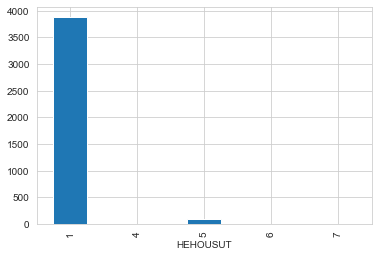

In [30]:
df.groupby(['HEHOUSUT']).HEFAMINC.count().plot(kind='bar')

In [31]:
# 'HEHOUSUT' aka type of housing
def housing_cat(n):
    if n == 1:
        return 'HU'
    elif n != 1:
        return 'other'

In [32]:
df['housing_cat'] = df.HEHOUSUT.apply(housing_cat)
df['housing_cat'].value_counts()

HU       3879
other     104
Name: housing_cat, dtype: int64

# Metropolitan or not

In [33]:
df.groupby(["GTMETSTA"]).HEFAMINC.count()

GTMETSTA
1    3176
2     766
3      41
Name: HEFAMINC, dtype: int64

In [34]:
def metro_cat(n):
    if n == 1 or n==3:
        return 1
    else:
        return 0

In [35]:
df['metropolitan'] = df.GTMETSTA.apply(metro_cat)

In [36]:
df.metropolitan.value_counts()
df.columns

Index(['HEHOUSUT', 'HWHHWGT', 'GESTFIPS', 'GTMETSTA', 'HEFAMINC', 'HRNUMHOU',
       'HRHTYPE', 'PERRP', 'PRTAGE', 'PEMARITL', 'PESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'PENATVTY', 'PEMNTVTY', 'PEFNTVTY', 'PRCITSHP',
       'PRINUSYR', 'PRHRUSL', 'HUBUS', 'PEMJOT', 'PEMJNUM', 'PEHRFTPT',
       'PEHRRSN2', 'PEHRACTT', 'PRAGNA', 'PRNMCHLD', 'PECYC', 'PEIO1ICD',
       'PEIO1OCD', 'PECERT1', 'target', 'housing_cat', 'metropolitan'],
      dtype='object')

# Total Family Income

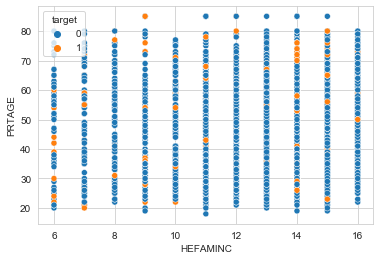

In [46]:
sns.scatterplot(data=df[df.HEFAMINC > 5], x='HEFAMINC', y='PRTAGE', hue='target')

No clear relationship exists between the 

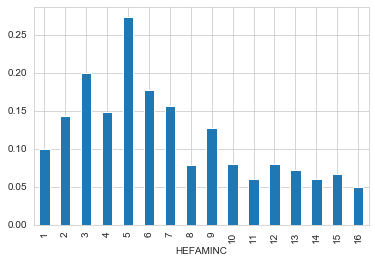

In [51]:
(df.groupby(['HEFAMINC']).target.sum() / df.groupby(['HEFAMINC']).target.count()).plot(kind='bar')

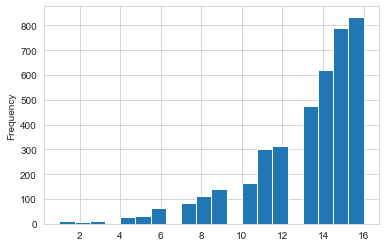

In [40]:
df.HEFAMINC.plot(kind='hist', bins=20);

In [80]:
df[df.target == 1].PRMJIND1.value_counts()

10    79
9     35
5     31
4     27
11    22
3     19
6     18
1     13
13    12
12    12
8      9
7      8
2      3
Name: PRMJIND1, dtype: int64